<a href="https://colab.research.google.com/github/gmehra123/data_science_projs/blob/main/2023_Lab5_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline

1. K-Means
2. Guassian Mixture Models
3. Agglomerative Clustering




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
import io, requests

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn.utils import shuffle
from sklearn.cluster import KMeans

import matplotlib
from sklearn import datasets
from sklearn.mixture import GaussianMixture

SEED = 0

# Unsupervised Learning

1.   Supervised Setting : {(x1,y1), (x2, y2), ....(xn, yn)}
2.   Unsupervised Setting : {x1, x2, .... xn}



---


Why?

Detect patterns and group similar things.

Vision task: Clustering cats vs dogs completely dependent on features.


***Amount of the signal we get is very weak as there is no supervision.***













## Clustering

*Task :* Group together parts of a dataset that are close together in some metric.

*Required :* Some notion of **distance** is required in the operating space of task

*Goals:*
1.   Minimize the intra cluster distance
2.   Maximize the inter cluster distance
3.   Sometimes requirement comes from the application domain

Well researched area from ML and data mining communities

*Result:* A lot of clustering algorithms

## Image compression using K-Means

*Problem:* **Image compression using K-Means**

### K-Means Algorithm

1.   This framework of problems is also called [Alternating Minimization](http://curtis.ml.cmu.edu/w/courses/index.php/Alternating_Minimization) a.k.a [block co-ordinate descent](https://https://web.eecs.umich.edu/~fessler/course/598/l/n-06-alt.pdf)


**Objective :** $f(S, \mu) = ∑_{i=1}^{k} ∑_{j \in S_{i}} ||x^{j}-\mu_{i}||^{2}$


#### Algorithm

1.   Pick an initial set of K-Means (usually at random) **[Sensitive to initialization]**
2.   **Assignment problem:** Partition the data points by assigning each data point to a cluster based on the mean that is closer to it.
3.   Update the cluster means by average of all data points assigned to corresponding clusters (centroids).
4.   Repeat 2-3 until we reach the stopping criteria.
5.   **Stopping Criteria:** Difference between cluster means is less than ϵ. **[Can get stuck in local optima]**


*Extensions:*
1.   K-Mediods picks **one of the points** as centroid
2.   Can pick other distance measures

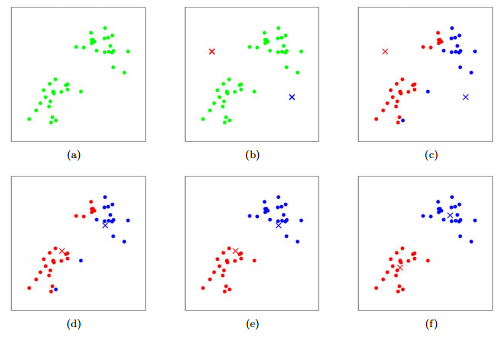

Application seen in class : Image segmentation

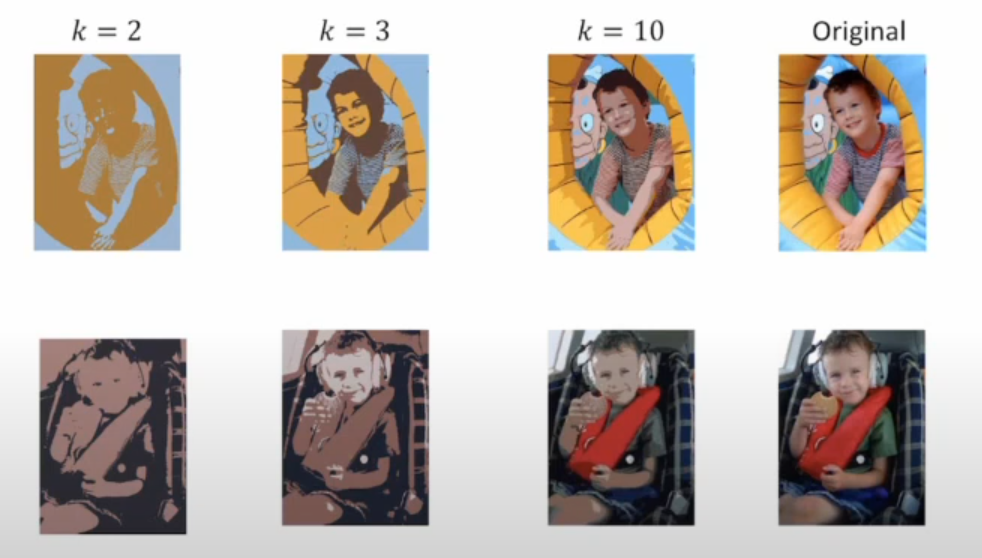

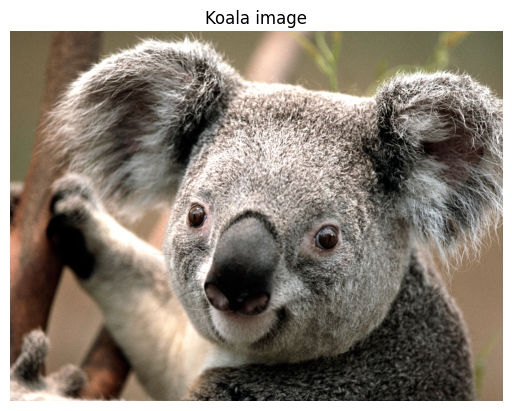

In [ ]:
r = requests.get('https://raw.githubusercontent.com/athresh/ml-for-engineers/master/datasets/Koala.jpg', timeout=4.0)
image = Image.open(io.BytesIO(r.content))
numpy_image = asarray(image)
numpy_image = np.array(numpy_image, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(numpy_image.shape)
image_data = np.reshape(numpy_image, (w * h, d))

# Display all results, alongside original image
plt.figure()
plt.axis('off')
plt.title('Koala image')
_ = plt.imshow(numpy_image)

In [ ]:
# Image is a grid with 768x1024 pixels and each pixel has three color components with RGB values
numpy_image.shape

(768, 1024, 3)

In [ ]:
image_data.shape

(786432, 3)

In [ ]:
# Code from: https://matplotlib.org/stable/gallery/color/named_colors.html
def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

Image has 85189 colors


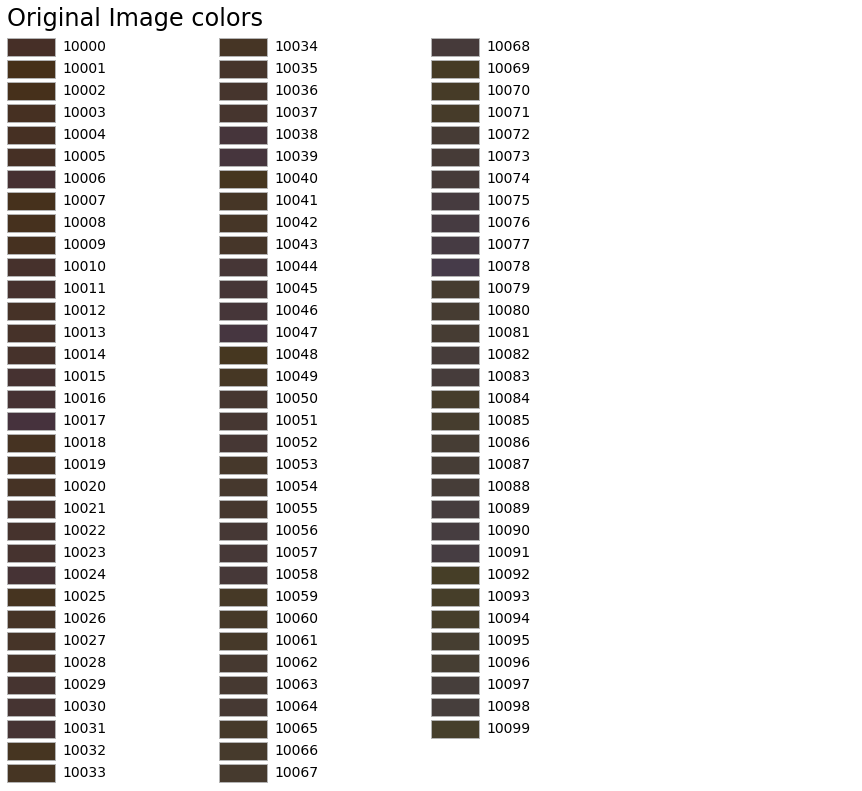

In [ ]:
unique_colors = np.unique(image_data,axis=0)
n_color = len(unique_colors)
print(f"Image has {n_color} colors")
colormap={i:unique_colors[i] for i in range(10000,10100)}
_ = plot_colortable(colormap, "Original Image colors ", sort_colors=False, emptycols=1)

Sample a small subset and perform kmeans clustering

In [ ]:
SEED = 0
train_data = shuffle(image_data, random_state=SEED, n_samples=1000)
print(train_data.shape)
kmeans = KMeans(n_clusters=20, random_state=SEED)
kmeans = kmeans.fit(train_data)

(1000, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[0.62442577 0.53333333 0.42442577]
 [0.20899654 0.17825836 0.1461361 ]
 [0.93376906 0.87215686 0.82152505]
 [0.37378359 0.35809731 0.31917211]
 [0.03252973 0.02700096 0.01992928]
 [0.75159664 0.66543417 0.60235294]
 [0.44641594 0.42719383 0.3812279 ]
 [0.62981872 0.60347762 0.58009619]
 [0.99558824 0.9872549  0.97426471]
 [0.56348039 0.53541667 0.50980392]
 [0.46784851 0.41332259 0.30400215]
 [0.13688725 0.11464461 0.08872549]
 [0.40276817 0.30080738 0.22733564]
 [0.55886198 0.48888889 0.36578239]
 [0.26866917 0.23245724 0.198665  ]
 [0.50093218 0.47913854 0.44802314]
 [0.3081761  0.28331484 0.24964854]
 [0.85420479 0.79372549 0.74074074]
 [0.71640867 0.60227038 0.51929825]
 [0.74884532 0.71433551 0.68984749]]


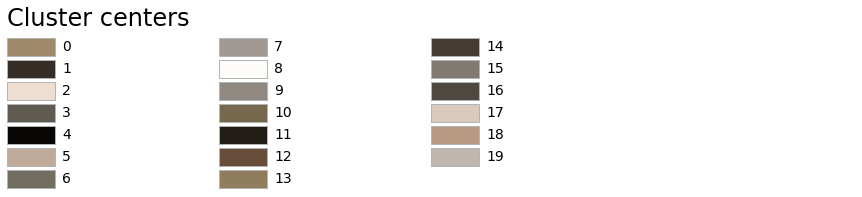

In [ ]:
print(kmeans.cluster_centers_)
colormap={i:kmeans.cluster_centers_[i] for i in range(len(kmeans.cluster_centers_))}
_ = plot_colortable(colormap, "Cluster centers", sort_colors=False, emptycols=1)

In [ ]:
pred = kmeans.predict(image_data)
print(pred.shape)
pred

(786432,)


array([12, 12, 10, ..., 13, 13, 13], dtype=int32)

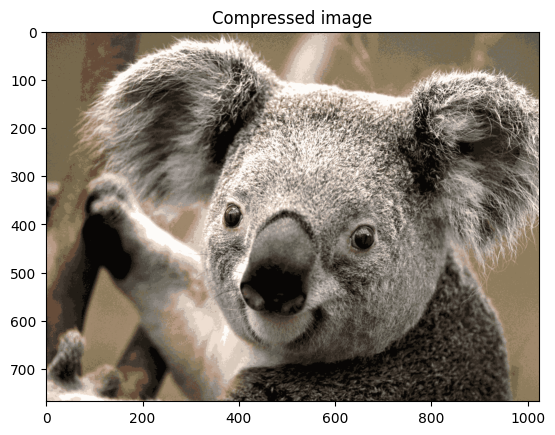

In [ ]:
compressed_image = kmeans.cluster_centers_[pred].reshape(w, h, -1)
plt.title("Compressed image")
_ = plt.imshow(compressed_image)

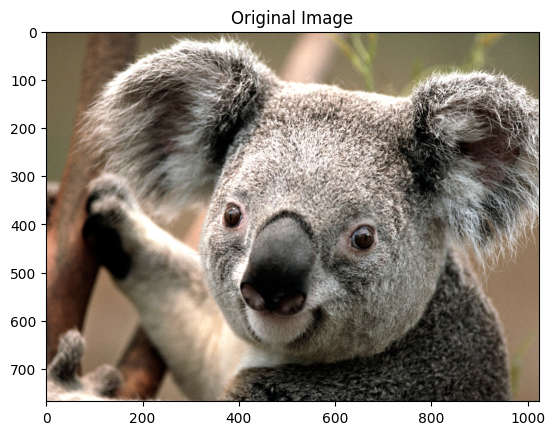

In [ ]:
plt.title("Original Image")
_ = plt.imshow(numpy_image)

### Exercise:

1. Try different Cluster sizes: 30, 10, 5, 3 etc
2. Save the image and compare the sizes:
```
import matplotlib
matplotlib.image.imsave('compressed_image.png', compressed_image)
matplotlib.image.imsave('original.png', numpy_image)
```
3. Try clustering another image: [Rainbow-Umbrella.jpg](https://raw.githubusercontent.com/athresh/ml-for-engineers/master/datasets/Rainbow-Umbrella.jpg)

`https://raw.githubusercontent.com/athresh/ml-for-engineers/master/datasets/Rainbow-Umbrella.jpg`

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


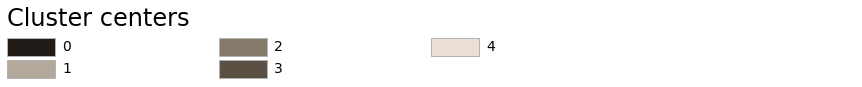

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=SEED)
kmeans = kmeans.fit(train_data)
colormap={i:kmeans.cluster_centers_[i] for i in range(len(kmeans.cluster_centers_))}
_ = plot_colortable(colormap, "Cluster centers", sort_colors=False, emptycols=1)

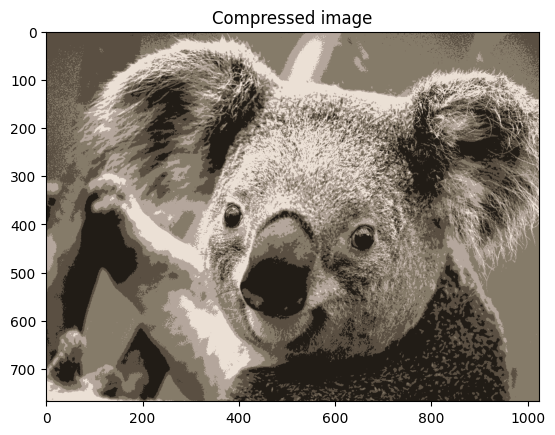

In [ ]:
pred = kmeans.predict(image_data)
compressed_image = kmeans.cluster_centers_[pred].reshape(w, h, -1)
plt.title("Compressed image")
_ = plt.imshow(compressed_image)

In [ ]:
matplotlib.image.imsave('compressed_image.png', compressed_image)
matplotlib.image.imsave('original.png', numpy_image)

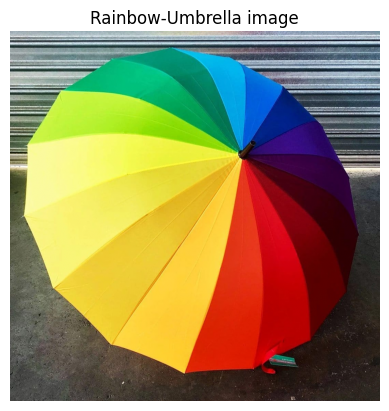

In [ ]:
r = requests.get('https://raw.githubusercontent.com/athresh/ml-for-engineers/master/datasets/Rainbow-Umbrella.jpg', timeout=4.0)
image = Image.open(io.BytesIO(r.content))
numpy_image = asarray(image)
numpy_image = np.array(numpy_image, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(numpy_image.shape)
image_data = np.reshape(numpy_image, (w * h, d))

# Display all results, alongside original image
plt.figure()
plt.axis('off')
plt.title('Rainbow-Umbrella image')
_ = plt.imshow(numpy_image)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


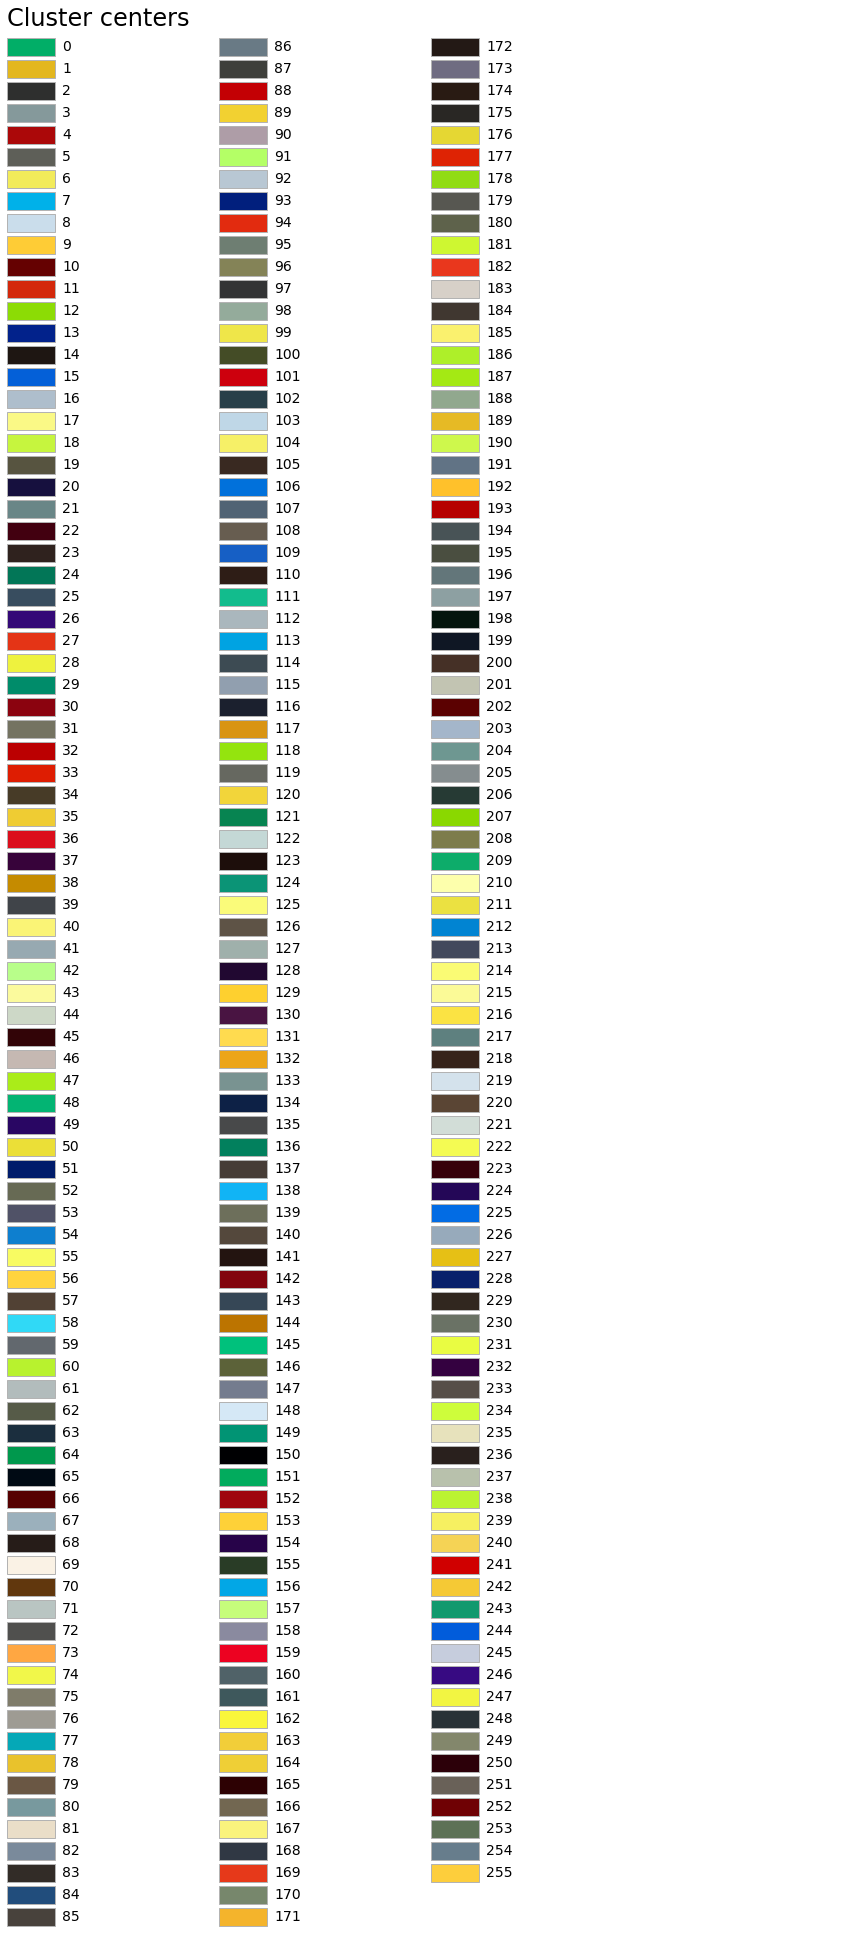

In [ ]:
train_data = shuffle(image_data, random_state=SEED, n_samples=1000)
kmeans = KMeans(n_clusters=256, random_state=SEED)
kmeans = kmeans.fit(train_data)
colormap={i:kmeans.cluster_centers_[i] for i in range(len(kmeans.cluster_centers_))}
_ = plot_colortable(colormap, "Cluster centers", sort_colors=False, emptycols=1)

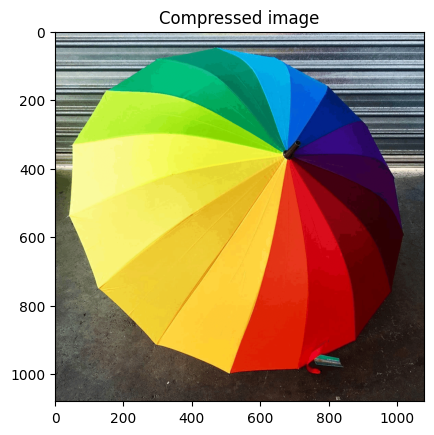

In [ ]:
pred = kmeans.predict(image_data)
compressed_image = kmeans.cluster_centers_[pred].reshape(w, h, -1)
plt.title("Compressed image")
_ = plt.imshow(compressed_image)

In [ ]:
matplotlib.image.imsave('compressed_image.png', compressed_image)
matplotlib.image.imsave('original.png', numpy_image)

## Soft Clustering

1.   **Problem**- Clustering typically assumes that each instance is given a **hard** assignment to exactly one cluster
2.   Does not allow uncertainty in class membership
3.   **Solution**- Soft clustering (Probabilistic Clustering) gives probabilities that an instance belongs to each set of clusters


---


### Mixture Model

Given a dataset: $x_1, x_2, ... x_n$

Mixture Model: $Θ = \{\alpha_{1}, \alpha_{2}, ... \alpha_{k}, θ_{1}, θ_{1},....θ_{k}\}$

$p(x| Θ) = ∑_{k=1}^{K}\alpha_{k} p_{k}(x|z_{k}, Θ_{k})$

Here, $\alpha_{k} = p(z_{k})$ are mixture weights and $p_{k}(x|z_{k}, Θ_{k})$ is a mixture component from some family of probability distributions parameterized by $Θ_{k}$



## Gaussian Mixture Model

Probabilistic Model that assumes all data points are generated from a mixture of finite number of Guassian distributions with unknown parameters.

$p(x_{i}| z_{k}, Θ) = N(x^{i}| μ_{k}, ∑_{k})$

$p(z_{k}) = \alpha_{k}$

Learning Objective:

$\text{argmax}_{Θ} Π_{i=1}^{N} p(x_{i}| Θ)$

$= \text{argmax}_{Θ} Π_{i=1}^{N} ∑_{k=1}^{K} p(x_{i}, z_{k} | Θ)$

$= \text{argmax}_{Θ} Π_{i=1}^{N} ∑_{k=1}^{K} p(x_{i} | z_{k}, Θ) p(z_{k}) $


---


How do we learn these parameters?

Maximum Likelihood Estimation?

**Expectation Maximization**



---

1.   EM is a special case of AM type of problems.
2.   How do we choose the number of components? **Validation data**


As always, first generate synthetic data

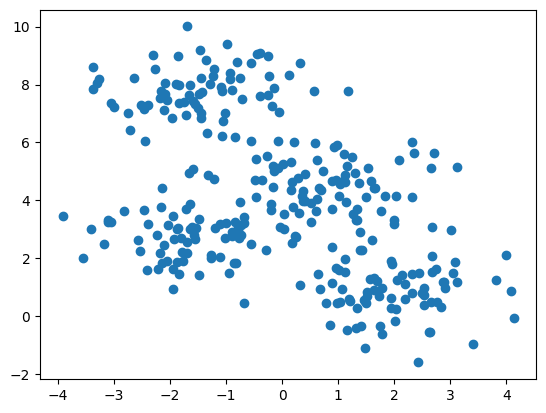

In [ ]:
SEED = 0
X, y = datasets.make_blobs(n_samples=300, centers=4, cluster_std=0.90, random_state=SEED)
plt.scatter(X[:,0], X[:,1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


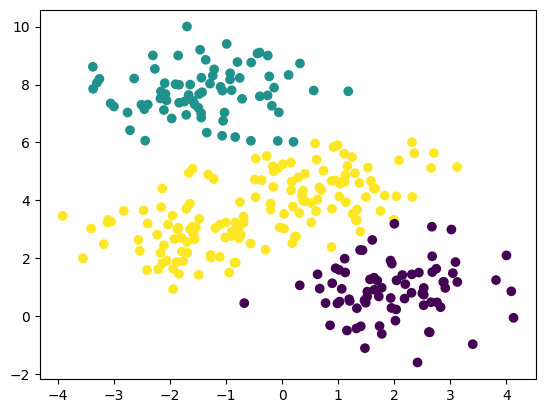

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=SEED)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

In [ ]:
def plot_gmm(X_train, clf):
    x_min, x_max = np.min(X_train[:,0]),  np.max(X_train[:,0])
    x = np.linspace(x_min,x_max)
    y_min, y_max = np.min(X_train[:,1]),  np.max(X_train[:,1])
    y = np.linspace(y_min, y_max )
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -clf.score_samples(XX)
    label = clf.predict(X_train)
    Z = Z.reshape(X.shape)
    CS = plt.contour(X, Y, Z)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=label)
    plt.axis('tight')
    plt.show()

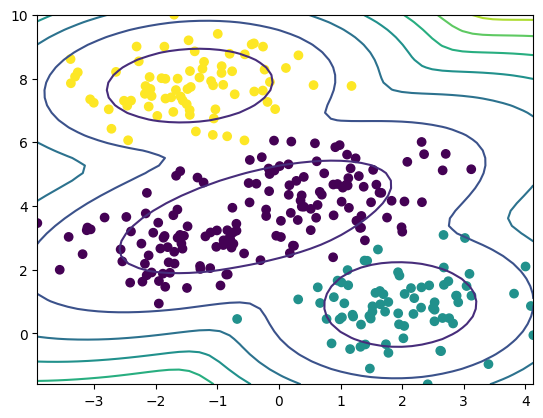

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
plot_gmm(X, gmm)

### Covariance types

Gaussian is defined by its **Mean and Covariance Matrix**.

Roughly, covariance matrix determines directions and lengths of the axes of its density contours.


1.   Spherical
2.   Diagonal
3.   Full
4.   Tied

In the increasing order of performance.

Full Covariance Matrix is prone to overfitting.



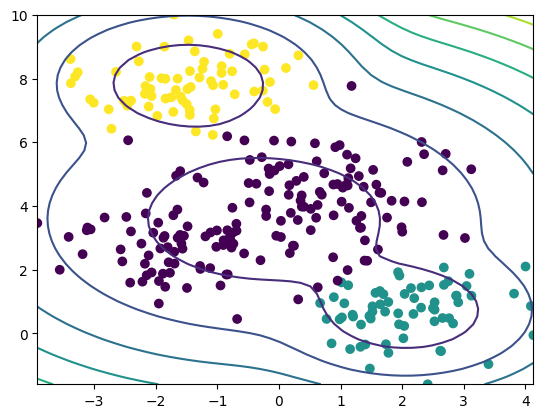

In [ ]:
gmm = GaussianMixture(n_components=3, covariance_type='spherical')
gmm.fit(X)
plot_gmm(X, gmm)

### Choice of initialization

1.   K-means (Default)
2.   K-means++
3.   random



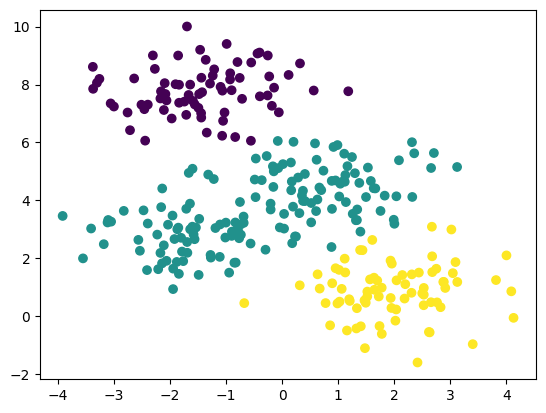

In [ ]:
gmm = GaussianMixture(n_components=3, init_params='kmeans')
gmm.fit(X)
label =gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=label);

On moon shaped data

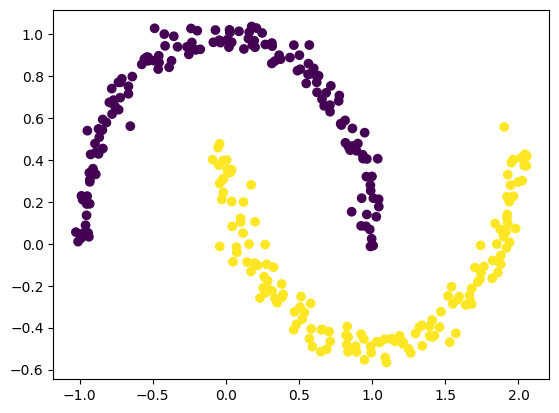

In [ ]:
X, y = datasets.make_moons(n_samples=300, noise=.05)
plt.scatter(X[:, 0], X[:, 1], c=y);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


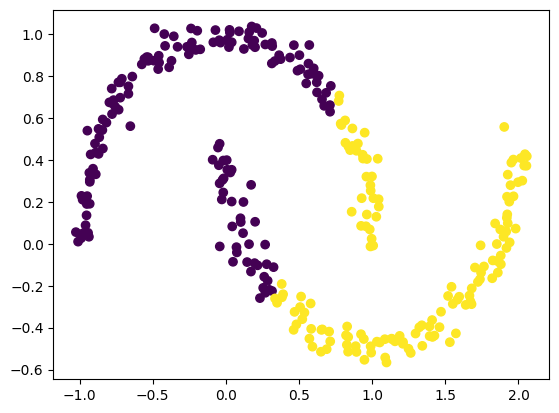

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=SEED)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


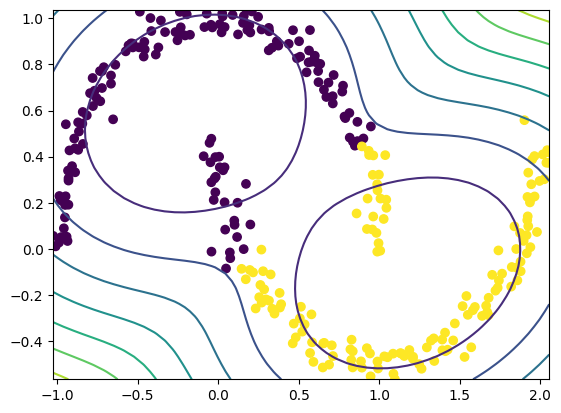

In [ ]:
gmm = GaussianMixture(n_components=2, max_iter=1, random_state=SEED)
gmm.fit(X)
labels = gmm.predict(X)
plot_gmm(X, gmm)

### Exercise

1. Try different number of components on the moon shaped data and plot them
2. Vary  `max_iter` and see how the mixture fit changes
3. Plot the contour map using the plot_gmm function

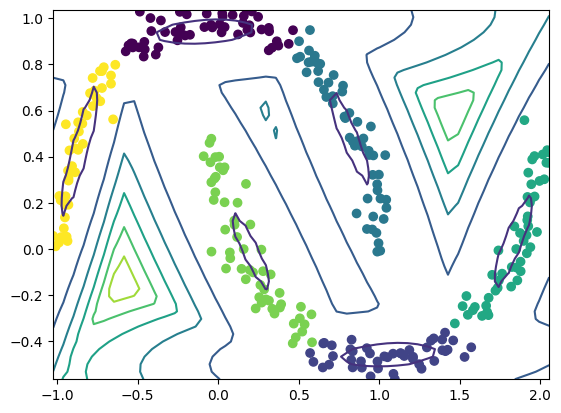

In [ ]:
gmm = GaussianMixture(n_components=6, random_state=SEED)
gmm.fit(X)
labels = gmm.predict(X)
plot_gmm(X, gmm)

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


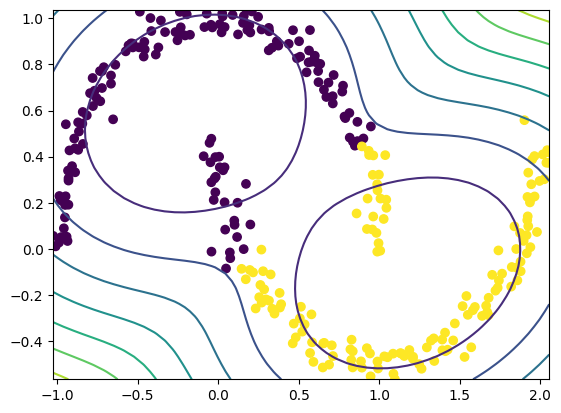

In [ ]:
gmm = GaussianMixture(n_components=2, max_iter=1, random_state=SEED)
gmm.fit(X)
labels = gmm.predict(X)
plot_gmm(X, gmm)

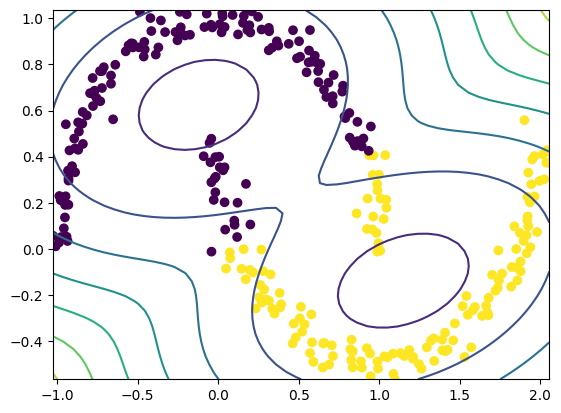

In [ ]:
gmm = GaussianMixture(n_components=2, max_iter=5, random_state=SEED)
gmm.fit(X)
labels = gmm.predict(X)
plot_gmm(X, gmm)

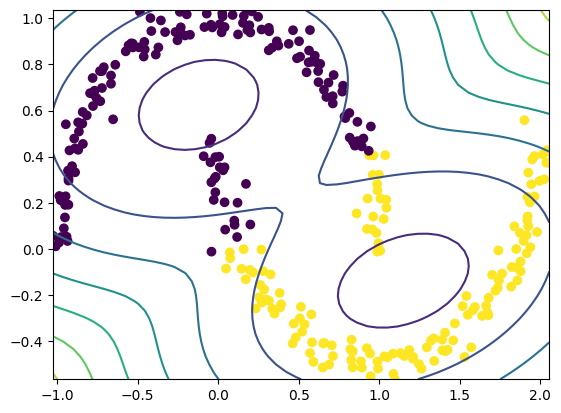

In [ ]:
gmm = GaussianMixture(n_components=2, max_iter=100, random_state=SEED)
gmm.fit(X)
labels = gmm.predict(X)
plot_gmm(X, gmm)

## Hierarchical Clustering



**Method:**

1.   Recursively merges pair of clusters of sample data based on the ***linkage distance***.
2.   Multiple criteria to choose the linkage distance such as ward, average, complete, single.

**Linkage Distance**

1.   ***single*** uses the minimum of the distances between all observations of the two sets. **CLOSEST PAIR**
2.   ***complete*** linkage uses the maximum distances between all observations of the two sets. **FARTHEST PAIR**
3.  ***average*** uses the average of the distances of each observation of the two sets. **AVERAGE**
4.  ***ward*** minimizes the variance of the clusters being merged. **MIN VARIANCE** [Find pair of clusters that leads to minimum increase in
total within cluster distance after merging]


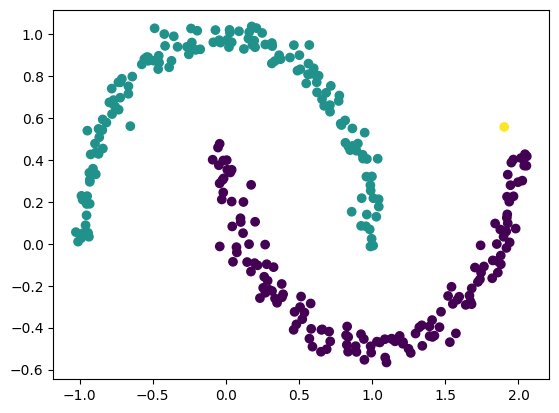

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(
        linkage="single", n_clusters=3)
agg.fit(X)
labels = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

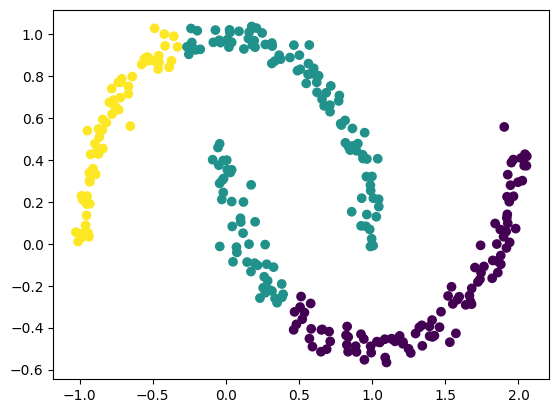

In [ ]:
agg = AgglomerativeClustering(
        linkage="complete", n_clusters=3)
agg.fit(X)
labels = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

### Exercise:

1. Try average linking
2. Vary the number of clusters
3. Visualize the clusters with a scatter plot

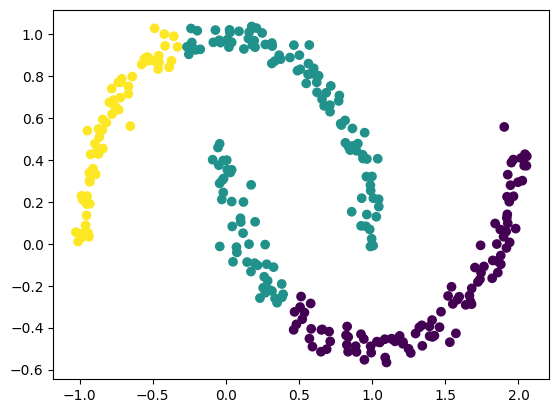

In [ ]:
agg = AgglomerativeClustering(
        linkage="average", n_clusters=3)
agg.fit(X)
labels = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

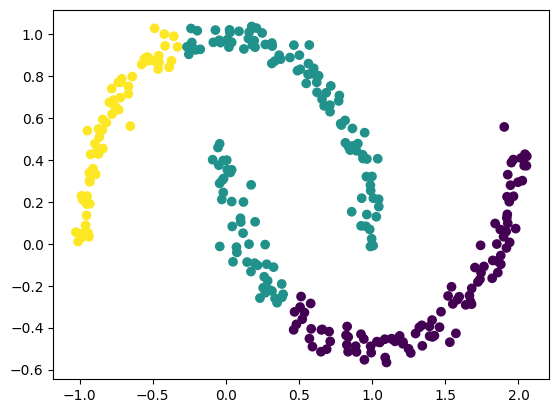

In [ ]:
agg = AgglomerativeClustering(
        linkage="ward", n_clusters=3)
agg.fit(X)
labels = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

Comparison of different linkages

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_001.png)

src: [Scikit examples](https://scikit-learn.org/stable/auto_examples/index.html#clustering)

# References

1. [Scikit KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
1. [Assumptions in KMeans](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py)
2. [Scikit Gaussian Mixture Model](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)
3. [Scikit Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
3. [Dendogram Plot](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py)
3. [Comparison of various clustering methods in Scikit learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)
4. [Spectral Clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_segmentation_toy.html#sphx-glr-auto-examples-cluster-plot-segmentation-toy-py)
5. [DBSCAN revisited](https://www.ccs.neu.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/notes_slides/revisitofrevisitDBSCAN.pdf)

Comparison of different clustering methods

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

src: [Scikit examples](https://scikit-learn.org/stable/auto_examples/index.html#clustering)


# Compression?

What?

1.   Reduce number of bits for encoding a message [Eg: Image, Speech]
2.   We should be able to compress and decompress the image


Why?
1.   Save time/bandwidth/space when transmitting/storing
2.   AI: Ability to compress data reflects understanding of the data

Types of compression

1.   Lossy [Happy to loose some details to save some bits]
2.   Lossless [Original bits can be compeletely reconstructed]

Compression Challenges

1.   [Hutter Prize](http://prize.hutter1.net/)

Compression utilizes generative models and the better the generative model the better the compression.

Applications

1.   Generic file compression -  Files: [gzip, bzip, 7z]
2.   Multimedia - GIF, JPEG, MP3, MPEG




---

[**JPEG (Joint Photographic Experts Group)**](https://en.wikipedia.org/wiki/JPEG)

1.   JPEG uses a lossy form of compression based on the discrete cosine transform (DCT).
2.   It converts each frame/field of the video source from the spatial (2D) domain into the frequency domain (a.k.a. transform domain).
3.   A perceptual model based loosely on the human psychovisual system that discards high-frequency information, i.e. sharp transitions in intensity, and color hue.
4.   The process of reducing information is called quantization.

---



Why compression is possible?

Statistical patterns - There is some redundancy

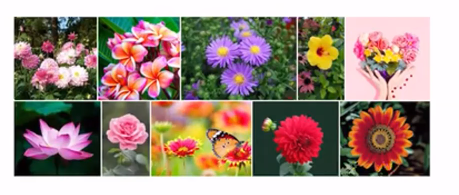




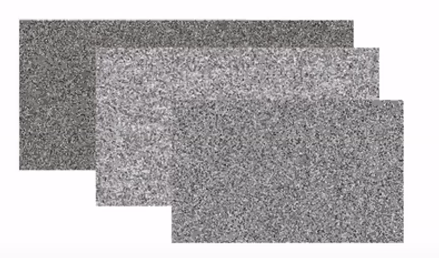